# Employee Salary Prediction Using Linear Regression

---

<img src="https://i.ibb.co/zr7g95W/template.jpg" width="1280">

**Table of Contents:**

1. Business Understanding
2. Importing Libraries and Datasets
3. Exploring Dataset
4. Data Cleaning
5. Exploratory Data Analysis
6. Data Preprocessing
7. Model Training
8. Model Evaluation
9. Prediction
10. Conclusion

## 1 - Business Understanding

This dataset contains comprehensive information about employees, focusing on various attributes including personal details, job-related information, and performance metrics. The goal is to use these features to predict the salary of the employees.

The primary objective is to predict employee salaries using a comprehensive dataset, involving data preprocessing, exploratory analysis, feature engineering, and model evaluation. By identifying key predictors of salary, the aim is to provide actionable insights and recommendations for HR practices, enhancing salary forecasting accuracy and informing strategic decisions.

## 2 - Importing Libraries and Datasets

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Utilities

Filter specific warnings in Pandas.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, pd.errors.SettingWithCopyWarning))

Sets Matplotlib plot style and parameters.

In [3]:
mpl.style.use(['fivethirtyeight'])
plt.rcParams.update({
  'font.size': 10,
  'lines.linewidth': 1,
  'figure.facecolor': 'white',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.titlesize': 18,
  'axes.grid': False,
  'axes.titleweight': 'bold',
  'axes.labelsize': 12,
  'axes.titlepad': 24,
  'axes.labelpad': 16,
  'legend.frameon': True,
  'legend.borderaxespad': 1
})

Creates annotations with y-values for each patch in a plot.

In [4]:
def display_y_values(ax):
  for p in ax.patches:
    ax.annotate(
      f'{p.get_height():.2f}',
      (p.get_x() + p.get_width() / 2.,p.get_height()),
      ha='center',
      fontsize=11,
      xytext=(0, 5),
      textcoords='offset points'
    )

Creates ahistogram plot

In [5]:
def create_hist_plot(data, color, column):
  plt.figure(figsize=(12,6))
  sns.histplot(data, kde=True, alpha=0.6, color=color, edgecolor='white')
  plt.title('{} Distribution'.format(column))
  plt.xlabel(column)
  plt.tight_layout()
  plt.show()

Converts snake_case strings to title case.

In [6]:
to_title_case = lambda str:str.replace('_', ' ').title()

Creates a box plot

In [7]:
def make_box_plot(column, color):
  plt.figure(figsize=(12,6))
  sns.boxplot(
    x=column,
    data=df,
    color=color,
    medianprops=dict(color='white', linewidth=2),
    whiskerprops=dict(color='darkslategrey', linestyle='dashed', linewidth=1.5),
    capprops=dict(color='darkslategrey', linewidth=1.5),
    boxprops=dict(linewidth=1.5)
  )
  plt.title(to_title_case(column))
  plt.xlabel(to_title_case(column))
  plt.tight_layout()
  plt.show()

Download the dataset from a given URL.

In [8]:
source_url = 'https://raw.githubusercontent.com/akhildev-mj/datasets/main/'
dataset_url = source_url + 'regression/employee_salary.csv'

!wget -O dataset.csv $dataset_url
print('Download completed')

--2024-06-04 09:32:04--  https://raw.githubusercontent.com/akhildev-mj/datasets/main/regression/employee_salary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76857 (75K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  75.06K  --.-KB/s    in 0.02s   

2024-06-04 09:32:05 (3.47 MB/s) - ‘dataset.csv’ saved [76857/76857]

Download completed


### Importing Datasets

In [9]:
df = pd.read_csv('dataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## 3 - Exploring Dataset

Summary information about the DataFrame.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

Descriptive statistics for the numerical columns in the DataFrame.

In [11]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


Descriptive statistics for the categorical columns in the DataFrame.

In [12]:
df.describe(include=['object'])

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Adinolfi, Wilson K",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,8/19/2018,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


## 4 - Data Cleaning

### Drop Unnecessary Columns

In [13]:
df.drop(columns=[
  'Employee_Name',
  'EmpID',
  'MaritalDesc',
  'Sex',
  'Department',
  'PerformanceScore'
], inplace=True)

df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,EmploymentStatus,ManagerName,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,0,1,1,5,4,0,62506,0,19,...,Active,Michael Albert,22.0,LinkedIn,4.60,5,0,1/17/2019,0,1
1,1,1,1,5,3,3,0,104437,1,27,...,Voluntarily Terminated,Simon Roup,4.0,Indeed,4.96,3,6,2/24/2016,0,17
2,1,1,0,5,5,3,0,64955,1,20,...,Voluntarily Terminated,Kissy Sullivan,20.0,LinkedIn,3.02,3,0,5/15/2012,0,3
3,1,1,0,1,5,3,0,64991,0,19,...,Active,Elijiah Gray,16.0,Indeed,4.84,5,0,1/3/2019,0,15
4,0,2,0,5,5,3,0,50825,1,19,...,Voluntarily Terminated,Webster Butler,39.0,Google Search,5.00,4,0,2/1/2016,0,2


### Missing Values

Print the total number of missing values in the DataFrame.

In [14]:
print('Number of missing values:', df.isnull().sum().sum())

Number of missing values: 215


Print the columns with number of missing values

In [15]:
print('Columns with missing values:')

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Columns with missing values:
DateofTermination    207
ManagerID              8
dtype: int64


Columns DateofTermination and ManagerID contains missing values.
*   Missing values in the DateofTermination column likely indicate that the employee is still employed.
*   Missing values in the ManagerID column might occur due to employee not having a manager assigned yet.



Assign a placeholder date to indicate that the employee is currently employed

In [16]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])

max_tenure = (df['DateofTermination'] - df['DateofHire']).dt.days.max()
df['DateofTermination'] = df.apply(
  lambda row: row['DateofHire'] + pd.Timedelta(days=max_tenure) if pd.isnull(row['DateofTermination']) else row['DateofTermination'],
  axis=1
)

Use the most frequent ManagerID value to replace the null values

In [17]:
manager_id_mode_values = df['ManagerID'].mode().values
number_of_missing_manager_ids = df['ManagerID'].isnull().sum()

mode_values = np.tile(
  manager_id_mode_values,
  int(number_of_missing_manager_ids / len(manager_id_mode_values))
)

df.loc[df['ManagerID'].isnull(), 'ManagerID'] = mode_values

Print the current number of missing values

In [18]:
print('Number of missing values:', df.isnull().sum().sum())

Number of missing values: 0


### Duplicate Values

Print the total number of duplicate rows in the DataFrame.

In [19]:
print('Number of duplicates:', len(df[df.duplicated()]))

Number of duplicates: 0


## 5 - Exploratory Data Analysis

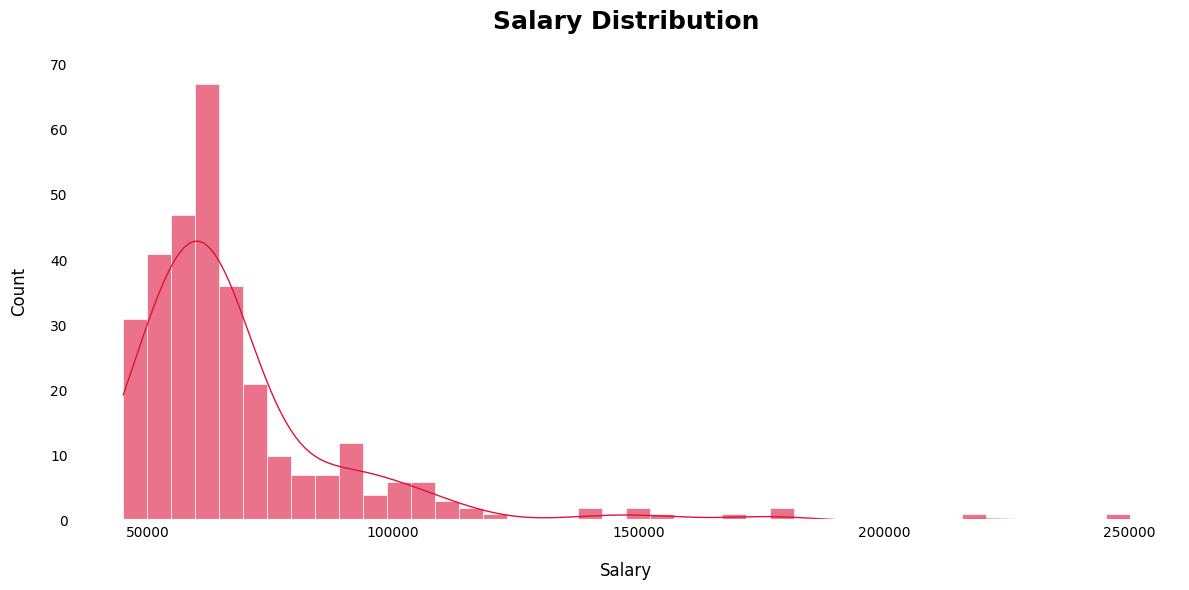

In [20]:
create_hist_plot(df['Salary'], 'crimson', 'Salary')

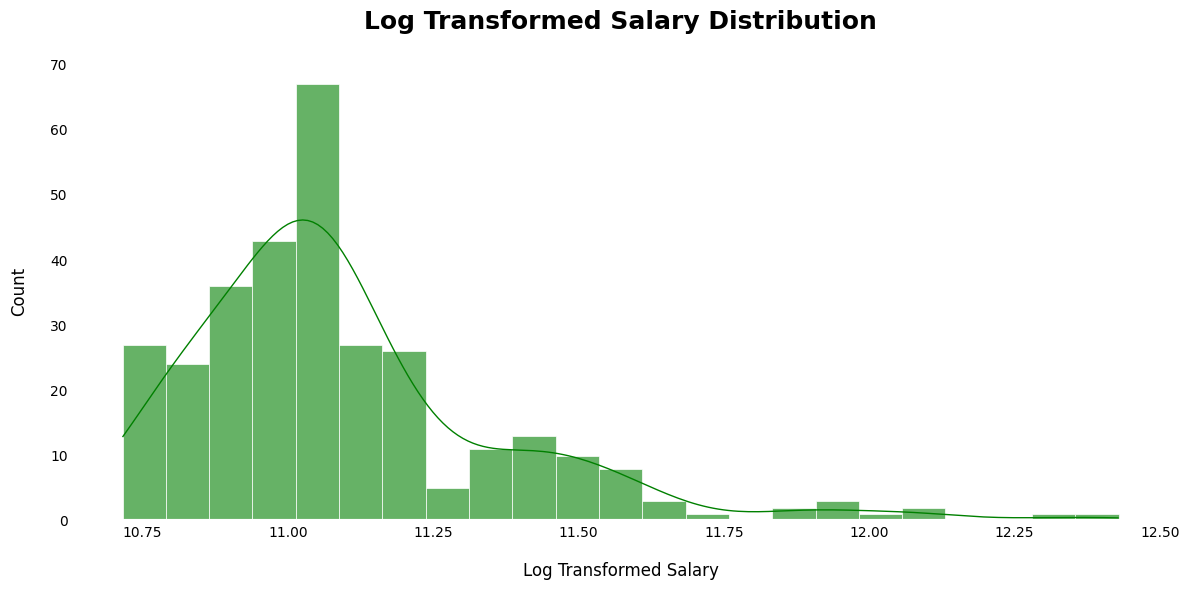

In [21]:
create_hist_plot(np.log(df['Salary']), 'green', 'Log Transformed Salary')

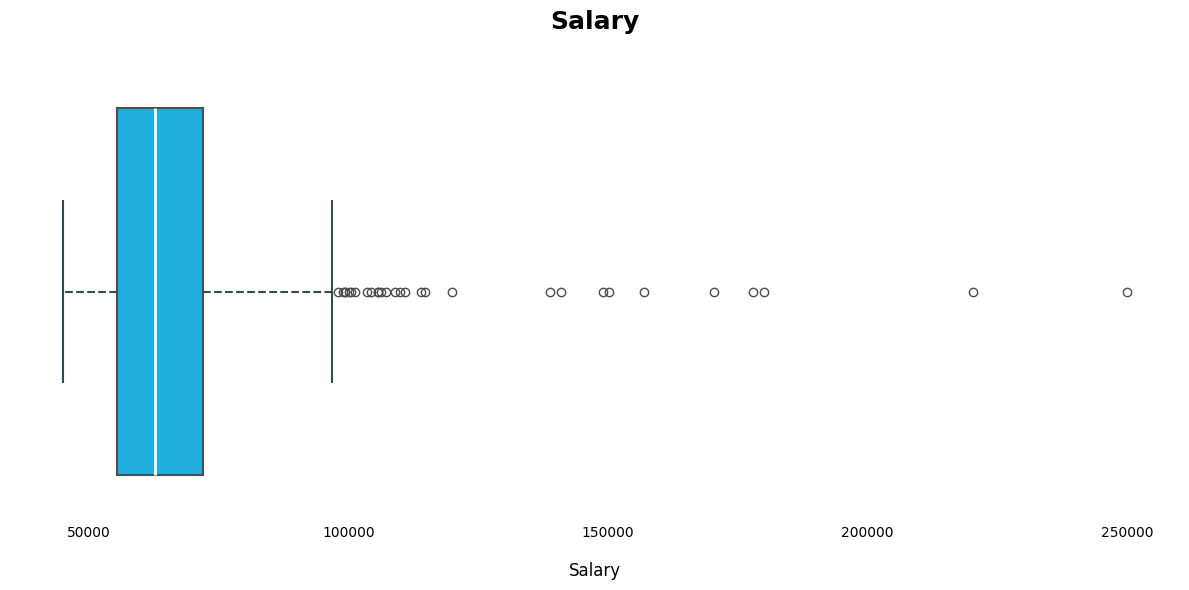

In [22]:
make_box_plot('Salary', 'deepskyblue')

Correlation heatmap of the data frame.

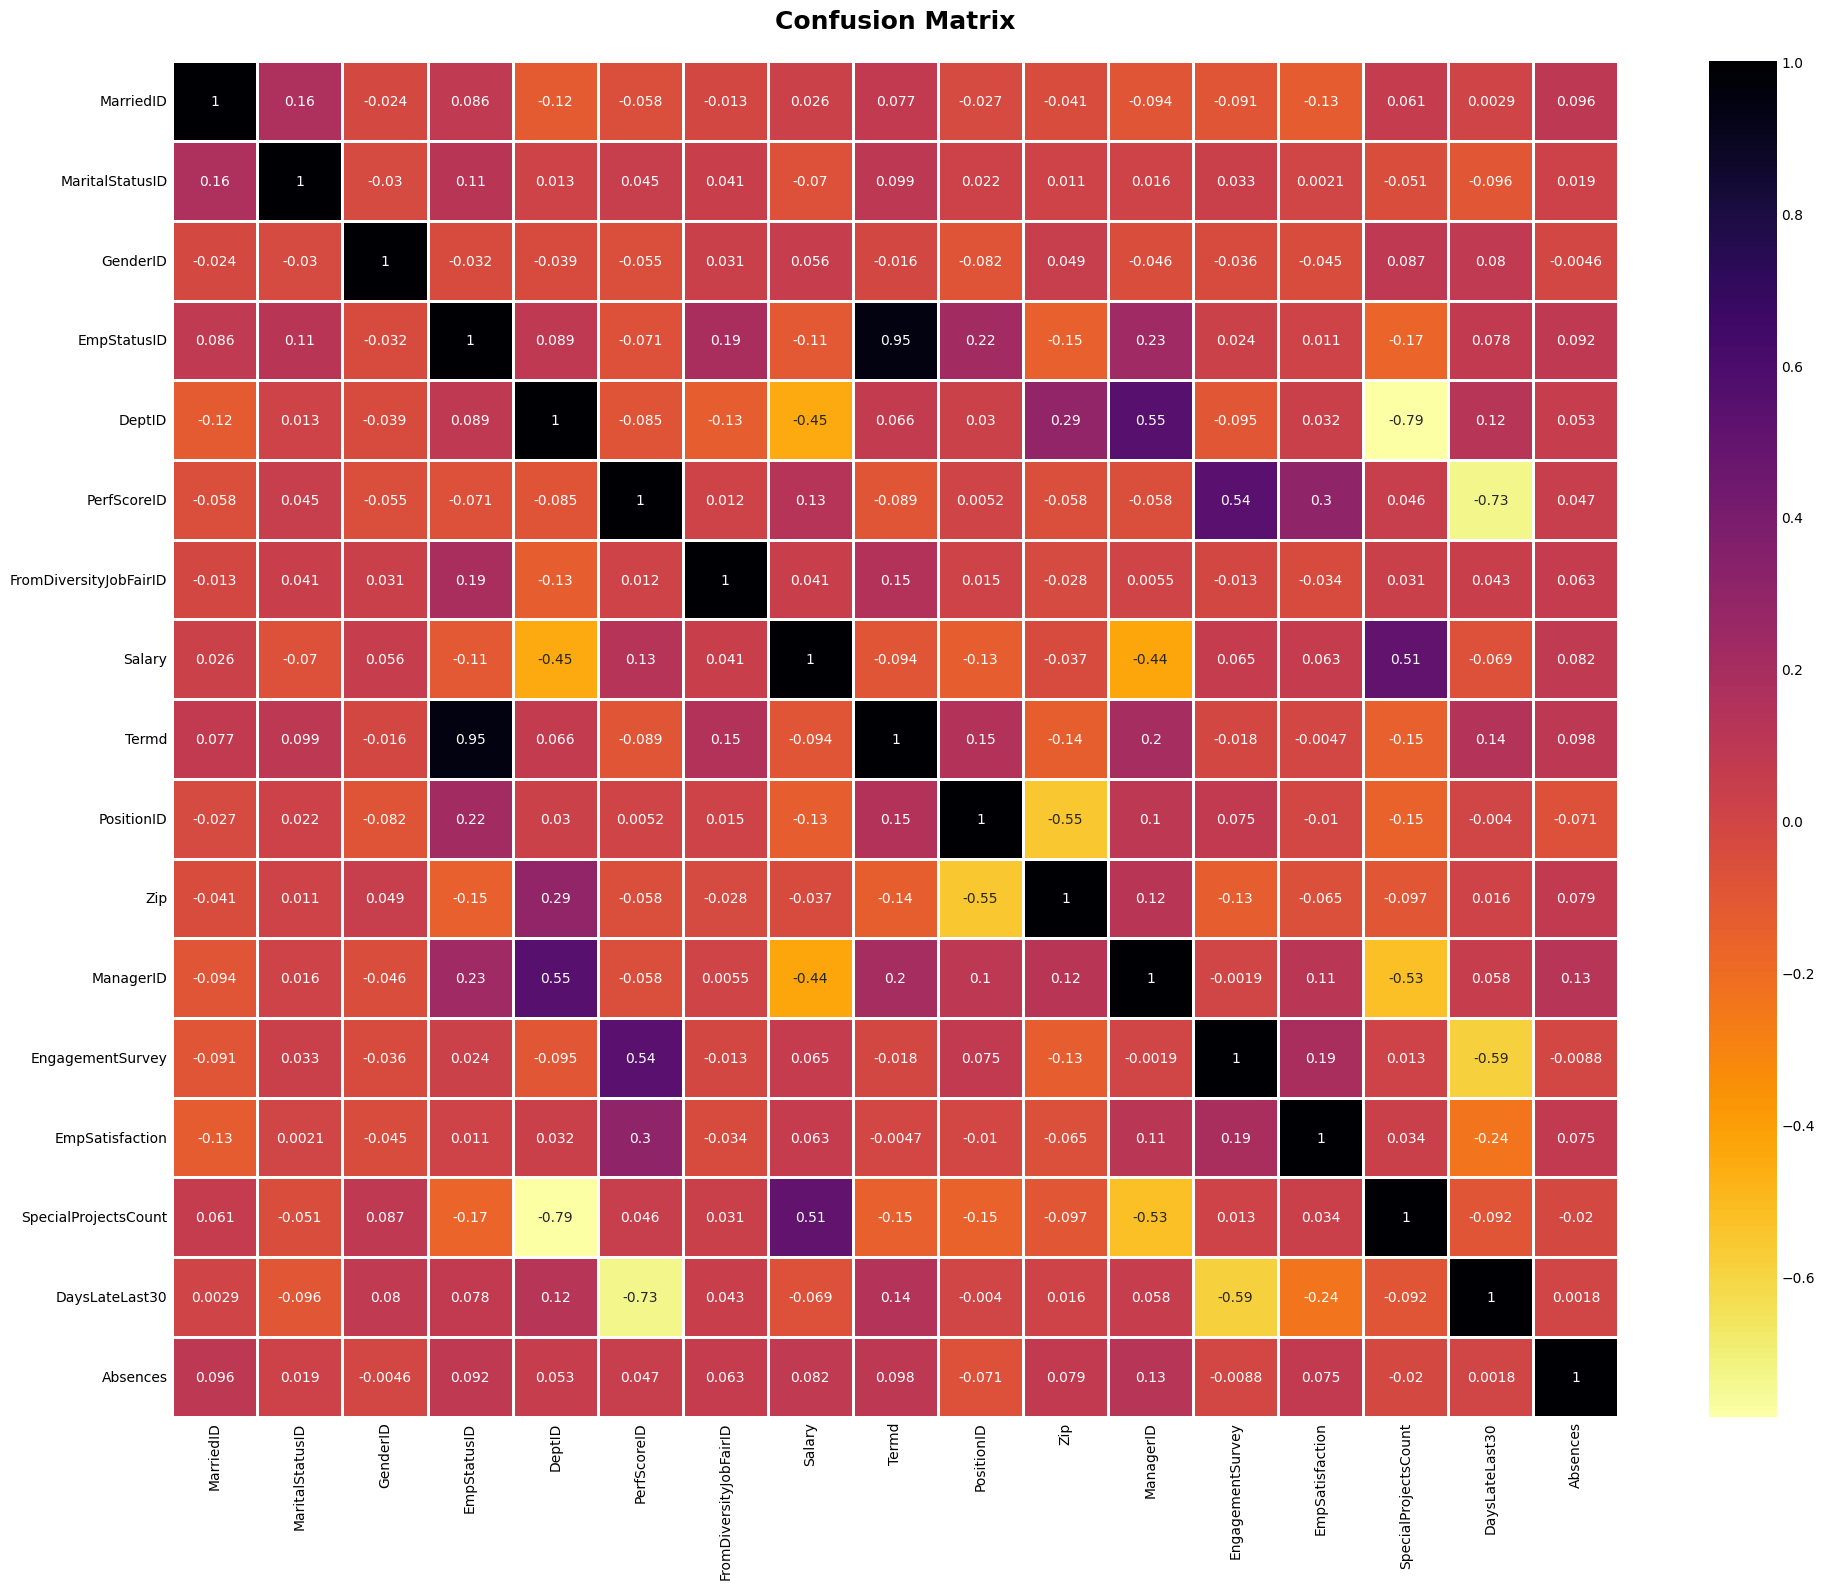

In [23]:
plt.figure(figsize=(20, 16))
sns.heatmap(
  data=df.corr(numeric_only=True),
  annot=True,
  cmap='inferno_r',
  linewidths=1
)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## 6 - Data Preprocessing

### Extracting New Feature Columns

Cacluclate tenure days from date of hire and termination

In [24]:
df['Tenure_days'] = (df['DateofTermination'] - df['DateofHire']).dt.days
df.drop(columns=['DateofHire', 'DateofTermination'], inplace=True)

df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,ManagerName,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Tenure_days
0,0,0,1,1,5,4,0,62506,0,19,...,Michael Albert,22.0,LinkedIn,4.60,5,0,1/17/2019,0,1,3493
1,1,1,1,5,3,3,0,104437,1,27,...,Simon Roup,4.0,Indeed,4.96,3,6,2/24/2016,0,17,444
2,1,1,0,5,5,3,0,64955,1,20,...,Kissy Sullivan,20.0,LinkedIn,3.02,3,0,5/15/2012,0,3,447
3,1,1,0,1,5,3,0,64991,0,19,...,Elijiah Gray,16.0,Indeed,4.84,5,0,1/3/2019,0,15,3493
4,0,2,0,5,5,3,0,50825,1,19,...,Webster Butler,39.0,Google Search,5.00,4,0,2/1/2016,0,2,1884


Calculate age from dob column

In [25]:
df['DOB'] = pd.to_datetime(df['DOB'], format='mixed')

df['Age'] = pd.to_datetime('now').year - df['DOB'].dt.year
df.drop(columns=['DOB'], inplace=True)

df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Tenure_days,Age
0,0,0,1,1,5,4,0,62506,0,19,...,22.0,LinkedIn,4.60,5,0,1/17/2019,0,1,3493,41
1,1,1,1,5,3,3,0,104437,1,27,...,4.0,Indeed,4.96,3,6,2/24/2016,0,17,444,49
2,1,1,0,5,5,3,0,64955,1,20,...,20.0,LinkedIn,3.02,3,0,5/15/2012,0,3,447,36
3,1,1,0,1,5,3,0,64991,0,19,...,16.0,Indeed,4.84,5,0,1/3/2019,0,15,3493,36
4,0,2,0,5,5,3,0,50825,1,19,...,39.0,Google Search,5.00,4,0,2/1/2016,0,2,1884,35


Calculate DaysSinceLastReview from the LastPerformanceReview_Date column

In [26]:
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
max_date = df['LastPerformanceReview_Date'].max()

df['DaysSinceLastReview'] = (max_date - df['LastPerformanceReview_Date']).dt.days
df.drop(columns=['LastPerformanceReview_Date'], inplace=True)

df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Tenure_days,Age,DaysSinceLastReview
0,0,0,1,1,5,4,0,62506,0,19,...,22.0,LinkedIn,4.60,5,0,0,1,3493,41,42
1,1,1,1,5,3,3,0,104437,1,27,...,4.0,Indeed,4.96,3,6,0,17,444,49,1100
2,1,1,0,5,5,3,0,64955,1,20,...,20.0,LinkedIn,3.02,3,0,0,3,447,36,2480
3,1,1,0,1,5,3,0,64991,0,19,...,16.0,Indeed,4.84,5,0,0,15,3493,36,56
4,0,2,0,5,5,3,0,50825,1,19,...,39.0,Google Search,5.00,4,0,0,2,1884,35,1123


### Converting Categorical Columns

Perform one hot encoding on categorical columns

In [27]:
df = pd.get_dummies(
  df,
  columns=df.dtypes[df.dtypes == np.object_].index.to_list() + ['Zip'],
  drop_first=True,
  dtype=int
)

df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,Zip_78230,Zip_78789,Zip_80820,Zip_83706,Zip_84111,Zip_85006,Zip_89139,Zip_90007,Zip_97756,Zip_98052
0,0,0,1,1,5,4,0,62506,0,19,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,5,3,3,0,104437,1,27,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,5,5,3,0,64955,1,20,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,5,3,0,64991,0,19,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,5,5,3,0,50825,1,19,...,0,0,0,0,0,0,0,0,0,0


### Feature selection using correlation

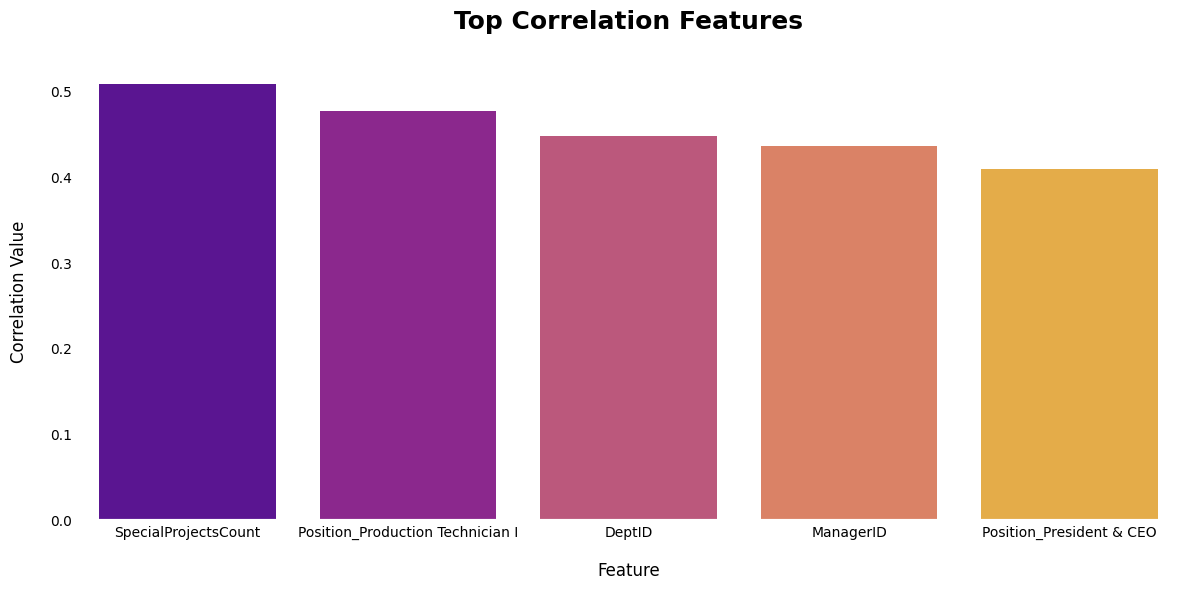

In [28]:
X = df.drop(columns=['Salary'])
y = df['Salary']
corr = X.corrwith(y).abs()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
  x=corr.sort_values(ascending=False)[:5].index,
  y=corr.sort_values(ascending=False)[:5].values,
  palette='plasma'
)

plt.title('Top Correlation Features')
plt.xlabel('Feature')
plt.ylabel('Correlation Value')
plt.tight_layout()
plt.show()

### Splitting Data into Features(X) and Target(y)

Select the feature variable as the highly correlated feature, i.e., SpecialProjectsCount, and set the target variable as Salary.

In [29]:
X = df[['SpecialProjectsCount']]
y = df['Salary']

print('The shape of X is', X.shape)
print('The shape of y is', y.shape)

The shape of X is (311, 1)
The shape of y is (311,)


### Data Transformation

Transform target variable using log function

In [30]:
y = np.log(y)
y[:5]

0    11.043018
1    11.556339
2    11.081450
3    11.082004
4    10.836144
Name: Salary, dtype: float64

### Splitting Features(X) and Target(y) for Training and Testing

Split featurea and target datas using train_test_split method

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print('The shape of X_train is', X_train.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of X_train is (248, 1)
The shape of y_train is (248,)
The shape of X_test is (63, 1)
The shape of y_test is (63,)


## 7 - Model Training

Create a linear regression model

In [32]:
model = LinearRegression()

Fit the model using train data

In [33]:
model.fit(X_train, y_train)

LinearRegression()

Find the coefficient and intercept

In [34]:
slope = model.coef_[0]
intercept = model.intercept_
line_equation = 'y = {}x + {}'.format(round(slope, 2), round(intercept, 2))

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Line Equation:',line_equation)

Coefficients: [0.07125415]
Intercept: 11.01536057047319
Line Equation: y = 0.07x + 11.02


Regression plot with coefficient and intercept

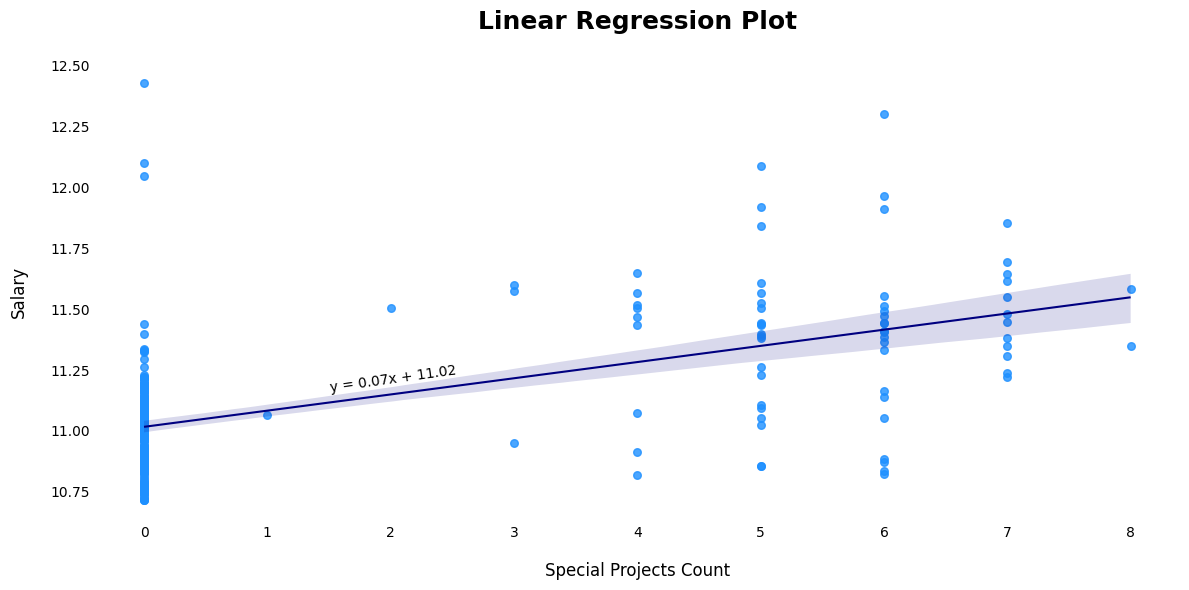

In [35]:
plt.figure(figsize=(12, 6))
sns.regplot(
  x=X,
  y=y,
  scatter_kws={'color':'dodgerblue', 'marker':'o', 's':30},
  line_kws={'color':'navy'}, label='Regression Line',
)

plt.text(1.5, 11.16, line_equation, rotation=8)
plt.title('Linear Regression Plot')
plt.xlabel('Special Projects Count')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

## 8 - Model Evaluation

Predict for test data

In [36]:
y_pred = model.predict(X_test)
y_pred[0:5]

array([11.01536057, 11.44288547, 11.01536057, 11.01536057, 11.01536057])

Evaluation results

In [37]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)

print('Model    -  {}'.format(type(model).__name__))
print('MAE      - ', np.round(mae, 4))
print('MSE      - ', np.round(mse, 4))
print('RMSE     - ', np.round(rmse, 4))
print('R2 Score - ', np.round(r2_score, 4))

Model    -  LinearRegression
MAE      -  0.1397
MSE      -  0.0365
RMSE     -  0.1911
R2 Score -  0.156


## 9 - Prediction

Predict for given special projects count

In [38]:
input_special_projects_count = 5
prediction = model.predict(
  pd.DataFrame([input_special_projects_count], columns=['SpecialProjectsCount'])
)[0]

print(
  'Salary prediction for special projects count {} is {}'.format(
    input_special_projects_count,
    np.exp(prediction)
  )
)

Salary prediction for special projects count 5 is 86823.38903178854


## 10 - Conclusion

The linear regression model did not perform well for this dataset because there were other features that impacted the salary of the employee. Also, the correlation between the salary and the feature was not very strong.